In [1]:
# import ipympl as ipl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [2]:
%matplotlib widget

[[-0.5802162  -0.69961999  0.41699045]
 [-0.64679621  0.08465103 -0.75795044]
 [-0.49497861  0.70948296  0.50162746]]


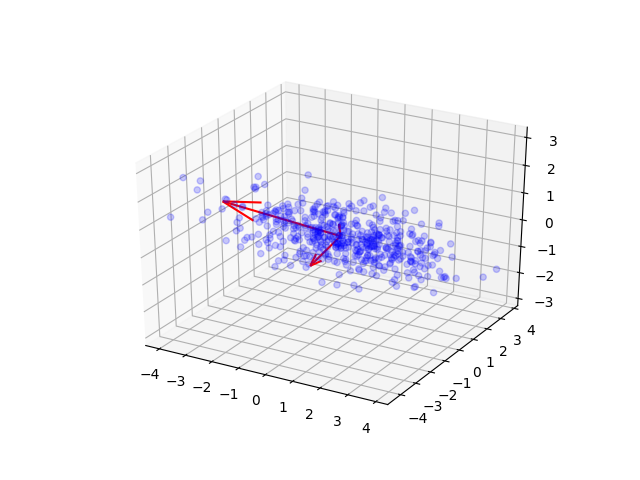

In [21]:
A = np.random.uniform(-1, 1, (3, 3))
A = A @ A.T
N = 500
# print(A)
mean = np.zeros(3)
G = np.random.multivariate_normal(mean, A, N)
u, s, vh = np.linalg.svd(G)
print(vh)
V0, V1, V2 = vh[0], vh[1], vh[2]
V0s, V1s, V2s = V0 * s[0] / 10, V1 * s[1] / 10, V2 * s[2] / 10 # scale singular vectors proportionally to singular values
Vs_matrix = np.array([V0s, V1s, V2s])
Vs_matrix.reshape(3, 3)

X, Y, Z = Vs_matrix.T[0], Vs_matrix.T[1], Vs_matrix.T[2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver([0, 0, 0], [0, 0, 0], [0, 0, 0], X, Y, Z, color='r')
ax.scatter(G.T[0],G.T[1],G.T[2], color='b', alpha=0.2)
plt.show()

In [22]:
def project_on_vect(u, v):
    # project u on v
    return np.dot(u, v) / np.dot(v, v) * v

def project_on_plane(u, v1, v2):
    # project u on plane v1, v2
    n = np.cross(v1, v2)
    return u - project_on_vect(u, n)

In [40]:
proj01 = []
proj02 = []
proj12 = []
for i in range(G.shape[0]):
    v = project_on_plane(G[i], V0, V1)
    x = np.dot(v, V0)
    y = np.dot(v, V1)
    proj01.append([x, y])
proj01 = np.array(proj01)

for i in range(G.shape[0]):
    v = project_on_plane(G[i], V1, V2)
    x = np.dot(v, V1)
    y = np.dot(v, V2)
    proj12.append([x, y])
proj12 = np.array(proj12)

for i in range(G.shape[0]):
    v = project_on_plane(G[i], V0, V2)
    x = np.dot(v, V0)
    y = np.dot(v, V2)
    proj02.append([x, y])
proj02 = np.array(proj02)

# plt.scatter(proj01.T[0], proj01.T[1])
#fig2 = plt.figure()
#fig2.add_subplot()
#ax2 = fig2.add_subplot()

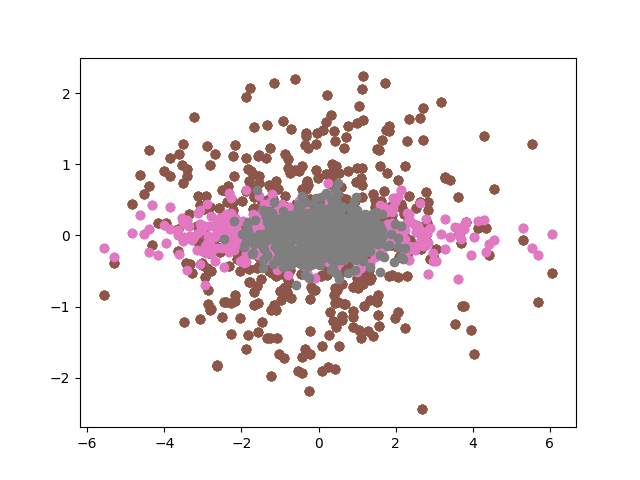

In [43]:
plt.scatter(proj01.T[0], proj01.T[1])
plt.scatter(proj02.T[0], proj02.T[1])
plt.scatter(proj12.T[0], proj12.T[1])
plt.show()